This notebook is part of the `nbsphinx` documentation: https://nbsphinx.readthedocs.io/.

# 一、临床用血评价指标

临床用血评价包含申请单合格率、临床用血评价、用血数据分析等几大类。

## （一）申请单合格率


    2019年11月份全院申请单合格率为94.0%。驳回理由占比最多的是无相关检验结果，占比为驳回总数的24%。
### 通过驳回占比，及驳回原因分布情况

In [1]:
import pandas as pd
df=pd.read_csv(r'data/申请单合格率.csv',encoding='gbk')
df.columns=['ApplyNo', 'ApplySheetSendTime', 'ApplySheetType', '医生',
       '科室', '审核结果', '驳回原因']

df['审核结果']=df['审核结果'].apply(lambda x: '通过' if x==1 else '驳回')
gp_dept_df= df.groupby(['科室'])['审核结果'].value_counts().unstack() 
gp_dept_df = gp_dept_df.fillna(0)

gp_doc_df= df.groupby(['医生'])['审核结果'].value_counts().unstack() 
gp_doc_df = gp_doc_df.fillna(0)

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

verRes = df.审核结果.value_counts()
bhyyRes = df.驳回原因.value_counts()
bhyyRes = round(bhyyRes/(bhyyRes.sum()*1.0),2)

In [3]:
totalNum,passNum,unpassNum =verRes.sum()*1.0,verRes['通过'],verRes['驳回']
passPercent,unpassPercent = passNum/totalNum,unpassNum/totalNum
passPercent,unpassPercent=round(passPercent,2),round(unpassPercent,2)

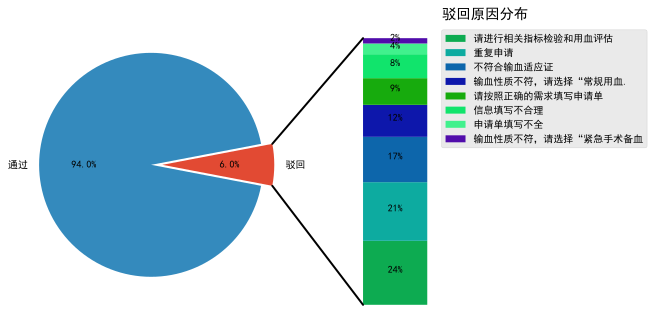

In [4]:
from matplotlib.patches import ConnectionPatch
import numpy as np

plt.style.use('ggplot')#print(plt.style.available)
# make figure and assign axis objects
fig = plt.figure(figsize=(12, 5.0625),dpi=150)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [unpassPercent,passPercent]
labels = ['驳回','通过']
explode = [ 0.1,0]
# rotate so that first wedge is split by the x-axis
angle =  -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = bhyyRes#[.33, .54, .07, .06]
width = .1
colors = [[13/255.0, 171/255.0, 81/255.0], [13/255.0, 171/255.0, 160/255.0],[13/255.0, 102/255.0, 171/255.0],
          [13/255.0, 23/255.0, 171/255.0],[23/255.0, 171/255.0, 13/255.0],[17/255.0, 228/255.0, 108/255.0],
          [65/255.0, 241/255.0, 141/255.0],[81/255.0, 13/255.0, 171/255.0],[81/255.0, 13/255.0, 171/255.0]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('驳回原因分布')
ax2.legend(bhyyRes.index.to_list(),loc='upper right')
ax2.axis('off')
ax2.set_xlim(-1.2 * width, 4 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

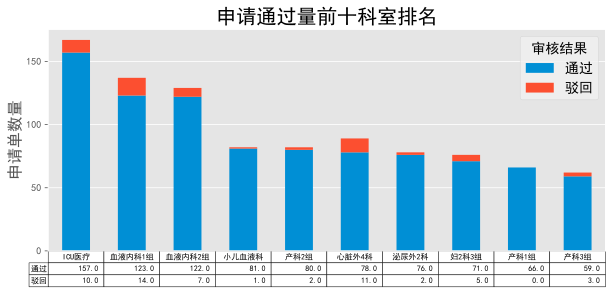

In [5]:
gp_dept_df.sort_values('通过', ascending=False,inplace=True)#
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks
ax.set_ylabel('申请单数量',size=16)
plt.style.use('fivethirtyeight')#print(plt.style.available)
_=gp_dept_df[:10].plot(table=True, ax=ax, kind='bar',stacked=True,figsize=(10, 4),title='申请通过量前十科室排名')

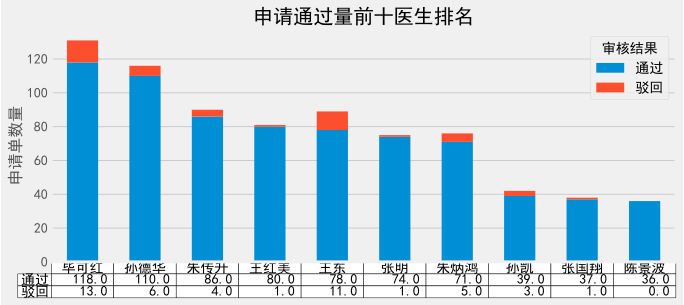

In [6]:
gp_doc_df.sort_values('通过', ascending=False,inplace=True)#

fig, ax = plt.subplots(1, 1)
ax.set_ylabel('申请单数量',size=16)
ax.get_xaxis().set_visible(False)   # Hide Ticks
plt.style.use('fivethirtyeight')#print(plt.style.available)
_=gp_doc_df[:10].plot(table=True, ax=ax, kind='bar',stacked=True,figsize=(10, 4),title='申请通过量前十医生排名')

## 科室及医生申请明细（申请单数量排名）

In [10]:
import seaborn as sns

#cm = sns.light_palette("green", as_cmap=True)#seagreen
dept_df=gp_dept_df.reset_index()
dept_df['合格率'] =  round(dept_df['通过']/(dept_df['通过']+dept_df['驳回']),2)

doc_df =gp_doc_df.reset_index()
doc_df['合格率'] =  round(doc_df['通过']/(doc_df['通过']+doc_df['驳回']),2)
hb_df=dept_df.join(doc_df,lsuffix='_科室', rsuffix='_医生')
styled_table=hb_df[hb_df['合格率_科室']>0.5].style.format({'合格率_科室': "{:.2%}",'合格率_医生': "{:.2%}" })\
    .background_gradient(cmap='BuGn',subset=['合格率_科室','合格率_医生']).hide_index()

from IPython.core.display import HTML
HTML(styled_table.render())

科室,通过_科室,驳回_科室,合格率_科室,医生,通过_医生,驳回_医生,合格率_医生
ICU医疗,157,10,94.00%,毕可红,118,13,90.00%
血液内科1组,123,14,90.00%,孙德华,110,6,95.00%
血液内科2组,122,7,95.00%,朱传升,86,4,96.00%
小儿血液科,81,1,99.00%,王红美,80,1,99.00%
产科2组,80,2,98.00%,王东,78,11,88.00%
心脏外4科,78,11,88.00%,张明,74,1,99.00%
泌尿外2科,76,2,97.00%,朱炳鸿,71,5,93.00%
妇2科3组,71,5,93.00%,孙凯,39,3,93.00%
产科1组,66,0,100.00%,张国翔,37,1,97.00%
产科3组,59,3,95.00%,陈景波,36,0,100.00%


## nbsphinx Prerequisites

Some of the aforementioned packages will install some of these prerequisites automatically, some of the things may be already installed on your computer anyway.

### Python

Of course you'll need Python, because both Sphinx and `nbsphinx` are implemented in Python.
There are many ways to get Python.
If you don't know which one is best for you, you can try [Anaconda](https://www.anaconda.com/distribution/).

### Sphinx

You'll need [Sphinx](https://www.sphinx-doc.org/) as well, because `nbsphinx` is just a Sphinx extension and doesn't do anything on its own.

If you use `conda`, you can get [Sphinx from the conda-forge channel](https://anaconda.org/conda-forge/sphinx):

    conda install -c conda-forge sphinx

Alternatively, you can install it with `pip` (see below):

    python3 -m pip install Sphinx --user

### pip

Recent versions of Python already come with `pip` pre-installed.
If you don't have it, you can [install it manually](https://pip.pypa.io/en/latest/installing/).

### pandoc

The stand-alone program [pandoc](https://pandoc.org/) is used to convert Markdown content to something Sphinx can understand. You have to install this program separately, ideally with your package manager. If you are using `conda`, you can install [pandoc from the conda-forge channel](https://anaconda.org/conda-forge/pandoc):

    conda install -c conda-forge pandoc

If that doesn't work out for you, have a look at `pandoc`'s [installation instructions](https://pandoc.org/installing.html).

<div class="alert alert-info">

**Note:**

The use of `pandoc` in `nbsphinx` is temporary, but will likely stay that way for a long time, see [issue #36](https://github.com/spatialaudio/nbsphinx/issues/36).

</div>

### Pygments Lexer for Syntax Highlighting

To get proper syntax highlighting in code cells, you'll need an appropriate *Pygments lexer*.
This of course depends on the programming language of your Jupyter notebooks (more specifically, the `pygments_lexer` metadata of your notebooks).

For example, if you use Python in your notebooks, you'll have to have the `IPython` package installed, e.g. with

    conda install -c conda-forge ipython

or

    python3 -m pip install IPython --user

<div class="alert alert-info">

**Note:**

If you are using Anaconda with the default channel and syntax highlighting in code cells doesn't seem to work,
you can try to install IPython from the `conda-forge` channel or directly with `pip`, or as a work-around,
add `'IPython.sphinxext.ipython_console_highlighting'` to `extensions` in your `conf.py`.

For details, see [Anaconda issue #1430](https://github.com/ContinuumIO/anaconda-issues/issues/1430) and
[nbsphinx issue #24](https://github.com/spatialaudio/nbsphinx/issues/24).

</div>

### Jupyter Kernel

If you want to execute your notebooks during the Sphinx build process (see [Controlling Notebook Execution](executing-notebooks.ipynb)), you need an appropriate [Jupyter kernel](https://jupyter.readthedocs.io/en/latest/projects/kernels.html) installed.

For example, if you use Python, you should install the `ipykernel` package, e.g. with

    conda install -c conda-forge ipykernel

or

    python3 -m pip install ipykernel --user

If you created your notebooks yourself with Jupyter, it's very likely that you have the right kernel installed already.